In [15]:
import pip
pip.main(["install", "citipy"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from citipy import citipy

url = "http://api.openweathermap.org"
weather_api_keys = "26fa1690d0b37df46a13b72024fe58d4"
print(requests.get(url))

<Response [200]>


In [17]:
# Output File (CSV)
output_data_file = "/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_keys)

26fa1690d0b37df46a13b72024fe58d4


In [18]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [19]:
#Url for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26fa1690d0b37df46a13b72024fe58d4"
city_data =[]
print("Beginning Data Retrieval ")
print("-------------------------")

record_count =1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count +=1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]
        
        city_data.append ({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind, 
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("city not found.skipping...")
        pass
        
        print("-----------------------------")
        print("Data Retrieval Completed     ")
        print("-----------------------------")


Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | yumen
Processing Record 5 of Set 1 | hay river
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | sebastian
Processing Record 8 of Set 1 | yarmouth
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | laiyang
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | barentsburg
city not found.skipping...
-----------------------------
Data Retrieval Completed     
-----------------------------
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | salekhard
Processing Record 16 of Set 1 | daoukro
Processing Record 17 of Set 1 | karlstad
Processing Record 18 of Set 1 | upata
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bogotol
Processing Record 21

In [20]:
city_data_pd = pd.DataFrame (city_data)
city_data_pd.count()


City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [21]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,78.80,94,20,4.70,MY,1605216331
1,pevek,69.70,170.31,8.15,94,41,7.52,RU,1605216331
2,aklavik,68.22,-135.01,6.80,84,90,13.87,CA,1605216332
3,yumen,40.28,97.20,30.69,75,25,7.58,CN,1605216332
4,hay river,60.82,-115.80,19.40,62,97,12.75,CA,1605216332


In [22]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.151316,21.382815,57.530420,74.393053,50.396709,7.941974,1.605216e+09
std,33.199253,88.866416,24.392041,18.883123,38.819506,5.620248,6.202390e+01
min,-54.800000,-175.200000,-13.970000,14.000000,0.000000,0.200000,1.605216e+09
25%,-5.880000,-56.010000,41.505000,65.000000,5.000000,4.000000,1.605216e+09
50%,22.890000,23.670000,64.510000,78.000000,48.000000,6.780000,1.605216e+09
75%,48.985000,100.885000,77.065000,88.000000,90.000000,10.290000,1.605216e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,34.450000,1.605216e+09


In [23]:
city_data = city_data_pd[(city_data_pd["Humidity"]>100)].index
city_data

Int64Index([], dtype='int64')

In [24]:
clean_city_data = city_data_pd.drop(city_data, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,78.80,94,20,4.70,MY,1605216331
1,pevek,69.70,170.31,8.15,94,41,7.52,RU,1605216331
2,aklavik,68.22,-135.01,6.80,84,90,13.87,CA,1605216332
3,yumen,40.28,97.20,30.69,75,25,7.58,CN,1605216332
4,hay river,60.82,-115.80,19.40,62,97,12.75,CA,1605216332


In [25]:
lats = clean_city_data ["Lat"]
max_temps = clean_city_data ["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data ["Cloudiness"]
wind_speed = clean_city_data ["Wind Speed"]
clean_city_data.to_csv(output_data_file, index_label="City_ID")

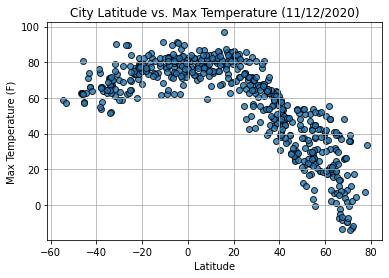

In [28]:
#Scatter Plot latitude vs. temperature
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
plt.title("City Latitude vs. Max Temperature (%s)"%time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("/users/rebeccatast/desktop/Python-api-Challenge/WeatherPy/Fig1.png")

plt.show()
